# Limpieza del Data 

### Exploracion de Datos 

In [1]:
#Cargamos Librerias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.decomposition import PCA 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Cargamos el data
data = pd.read_csv ('dataset_phishing.csv')


In [3]:
# Inspeccion de datos
#resumen del df
data.info()
# mostramos el numero total de filas, numero de columnas, nombres de la columna, y el tipo de dato de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [4]:
# mostramos las primeras filas
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
# verificamos si hay filas duplicadas
duplicados= data.duplicated()
print(f"El numeero de valores duplicados es: {duplicados.sum()}")

El numeero de valores duplicados es: 0


### Analisis Estadistico

In [6]:
#obtenemos un vision rapida y estadistica de los datos numericos 
data.describe()
#se muestra el numero de valores no nulos en cada columna

#los valores en los porcentiles del 25,50,75 % 
  #el 25% de los datos en la columna length_url es menor o igual a 33
  #el 50$ es mediana
  #el 75% de los datos es menor o igual a 71 (length_url)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [7]:
# Se determina como variable objetivo la variable "status"
#resumen estadistico de 'status'
print(data['status'].value_counts())

status
legitimate    5715
phishing      5715
Name: count, dtype: int64


Se tiene la misma cantidad de Urls legitimos y phishing, este balanceo del conjunto de datos asegura evitar un sesgo en el modelo.

In [8]:
#Analizamos la correlacion entre variables
#calculo de la matriz de correlacion
columnas_numericas= data.select_dtypes(include=['number']).columns[:89]
matriz= data[columnas_numericas].corr()

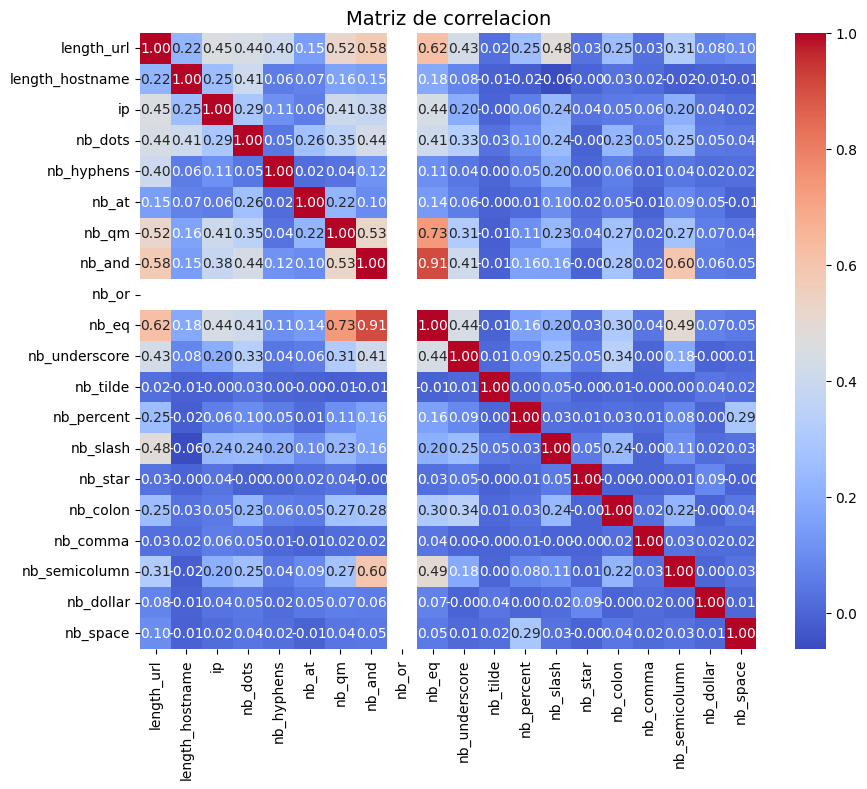

In [9]:
#Analizamos la correlacion entre variables
#calculo de la matriz de correlacion
columnas_numericas= data.select_dtypes(include=['number']).columns[:20]
matriz2= data[columnas_numericas].corr()

plt.figure(figsize=(10,8))
sns.heatmap(matriz2, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Matriz de correlacion", fontsize=14)
plt.show()


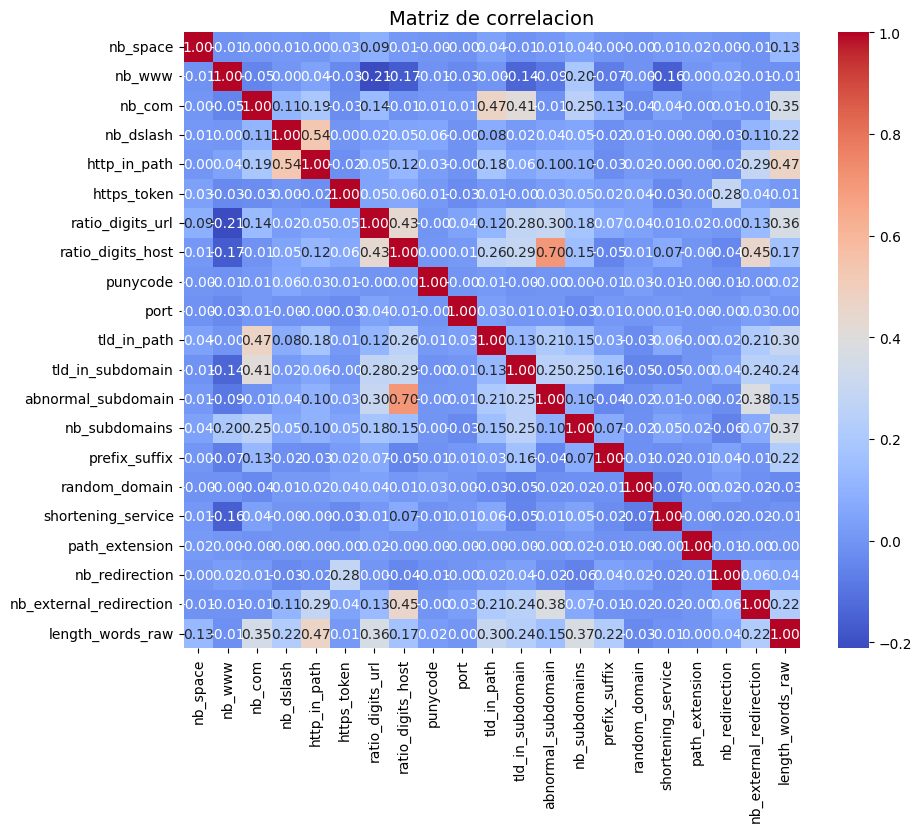

In [10]:
#Analizamos la correlacion entre variables
#calculo de la matriz de correlacion
columnas_numericas= data.select_dtypes(include=['number']).columns[19:40]
matriz2= data[columnas_numericas].corr()

plt.figure(figsize=(10,8))
sns.heatmap(matriz2, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Matriz de correlacion", fontsize=14)
plt.show()


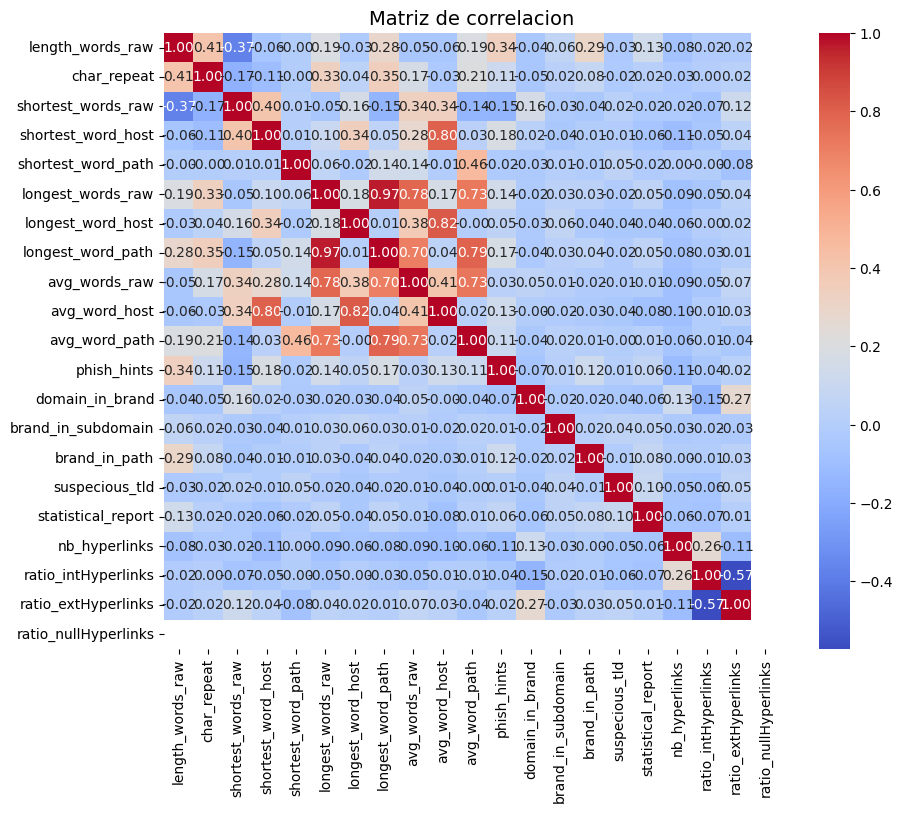

In [11]:
#Analizamos la correlacion entre variables
#calculo de la matriz de correlacion
columnas_numericas= data.select_dtypes(include=['number']).columns[39:60]
matriz2= data[columnas_numericas].corr()

plt.figure(figsize=(10,8))
sns.heatmap(matriz2, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Matriz de correlacion", fontsize=14)
plt.show()


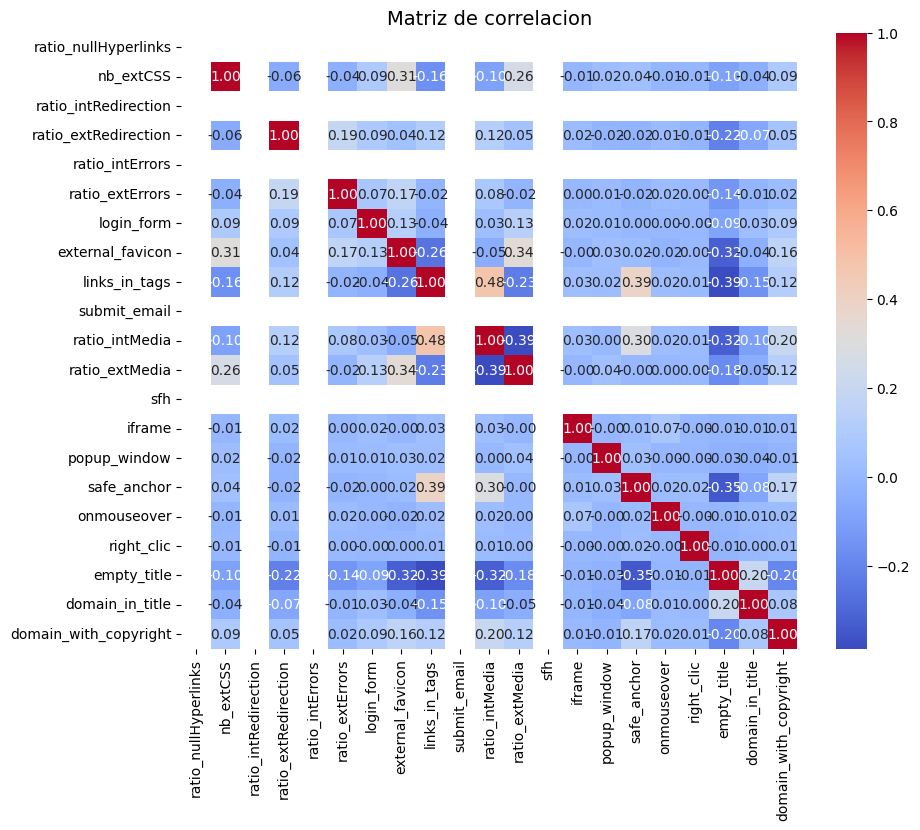

In [12]:
#Analizamos la correlacion entre variables
#calculo de la matriz de correlacion
columnas_numericas= data.select_dtypes(include=['number']).columns[59:80]
matriz2= data[columnas_numericas].corr()

plt.figure(figsize=(10,8))
sns.heatmap(matriz2, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Matriz de correlacion", fontsize=14)
plt.show()


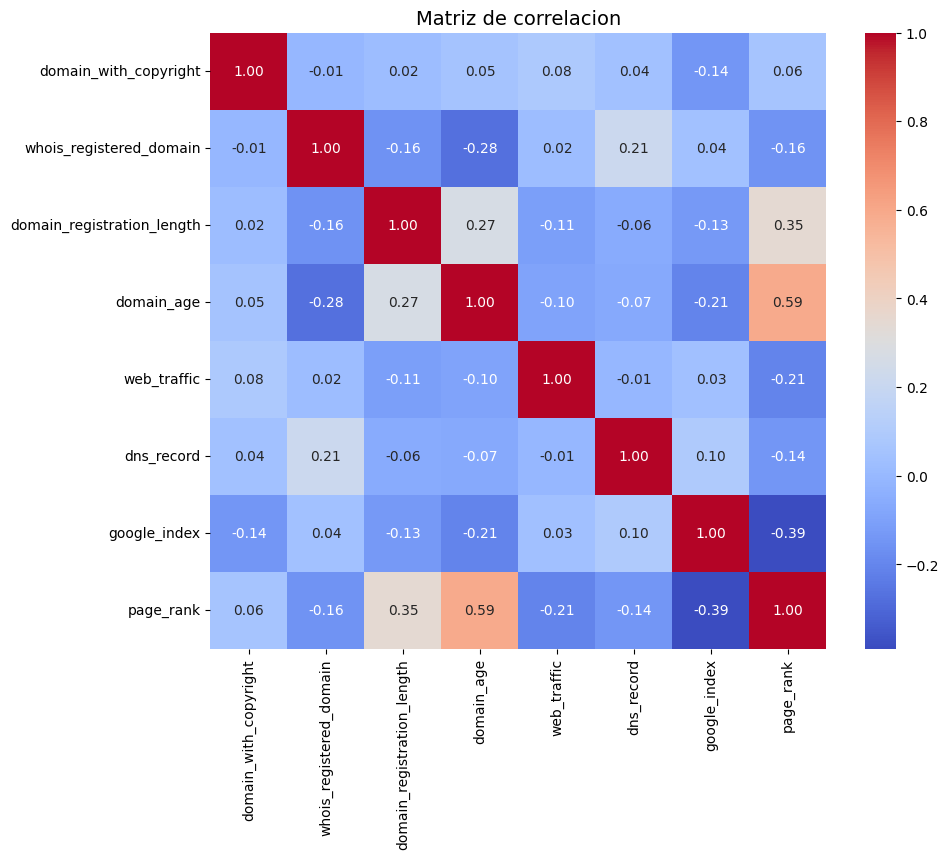

In [13]:
#Analizamos la correlacion entre variables
#calculo de la matriz de correlacion
columnas_numericas= data.select_dtypes(include=['number']).columns[79:89]
matriz2= data[columnas_numericas].corr()

plt.figure(figsize=(10,8))
sns.heatmap(matriz2, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Matriz de correlacion", fontsize=14)
plt.show()


In [ ]:
#creamos una matriz triangular superior
matriz_triangular= matriz.where(np.triu(np.ones(matriz.shape), k=1) .astype(bool))
#Identificacio y eliminacion de columnas
correlacion_alta= [col for col in matriz_triangular.columns if any (matriz_triangular [col] > 0.80)]
data_reducida= data.drop(columns= correlacion_alta)

#mostramos las columnas a eliminar
print("columnas que se proponen eliminar por presentar alta correlacion")
print(correlacion_alta)

columnas que se proponen eliminar por presentar alta correlacion
['nb_eq', 'longest_word_path', 'avg_word_host']


Guardamos el nuevo data reducido en un nuevo archivo 

In [15]:
print(type(data_reducida))

<class 'pandas.core.frame.DataFrame'>


In [20]:
data_reducida.to_csv('data_reducida.csv', index=False)
print("El data frame reducido se ha guardado en 'data_reducida.csv'")

El data frame reducido se ha guardado en 'data_reducida.csv'


In [19]:
#verificacion de columnas de antes y despues
columnas_data=data.shape[1]
columnas_daton= data_reducida.shape[1]
columnas_eliminadas=columnas_data-columnas_daton

print(f"el numero de columnas del data principal es:{columnas_data}")
print(f"numero de columas del data_reducido:{columnas_daton}")
print(f"numero de columnas eliminadas: {columnas_eliminadas}")

el numero de columnas del data principal es:89
numero de columas del data_reducido:86
numero de columnas eliminadas: 3
